ФИО: Шагина Екатерина Владимировна
БЭК211

# Задача 1

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from math import sqrt
import matplotlib as plt
from scipy.stats import expon

# пункт а)

Вероятность встречи нового таксиста на 1-й день: 
$$P_1 = 1$$ \
На 2-й день:
$$P_2 = 1 * \frac {n-1}{n}$$ \
На 3-й день:
$$P_3 = 1* \frac {n-1}{n} * \frac {n-2}{n}$$ \
... \
На 10-й день: 
$$P_n = \prod_ {k=0}^{8} \frac {n-k}{n} * \frac {9}{n}$$

Функцией правдоподобия для данной задачи будет вероятность того, что на первых 9 заказах приедут только уже приезжавшие таксисты, а на 10-ом заказе приедет новый таксист, т.е.:

$$L(n) = P(\text{10-ый заказ - новый таксист}) = \prod_{k=0}^{8} \frac{n-k}{n} \cdot \frac{9}{n}$$

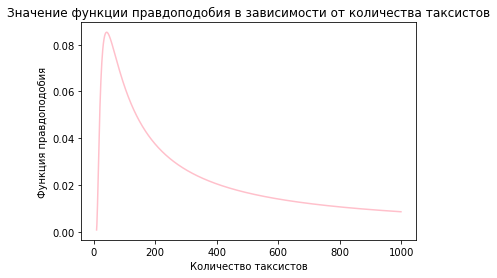

In [78]:
def Likelihood(n):
    
    p = 1
    for k in range(2,11):
        p = p*(n-k+2)/n
    return p*(9)/n

likelihood_values = [Likelihood(n) for n in range(9, 1000)]
n_values = np.arange(9, 1000)

plt.plot(n_values, likelihood_values, color = 'pink') 
plt.xlabel("Количество таксистов")
plt.ylabel("Функция правдоподобия")
plt.title('Значение функции правдоподобия в зависимости от количества таксистов')
plt.show()


In [73]:
max_index = np.argmax(likelihood_values)
maximum_likelihood = likelihood_values[max_index]
estimated_n = n_values[max_index]
print(f'Оценка числа n методом максимального правдоподобия: {estimated_n}')

Оценка числа n методом максимального правдоподобия: 42


# пункт б)

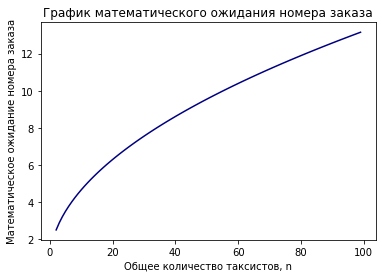

In [80]:

def prob(k, n):
    p = 1
    for i in range(2, k+1):
        p = p * (n - i + 2) / n
    return p * (k - 1) / n

def expected(n):
    c = 0
    for k in range(2, n+2):
        c = c + k * prob(k, n)
    return c

n_values = np.arange(2, 100)
E = [expected(n) for n in n_values]

plt.plot(n_values, E, color='navy')

plt.xlabel('Общее количество таксистов, n')
plt.ylabel('Математическое ожидание номера заказа')
plt.title('График математического ожидания номера заказа')
plt.show()




В этом коде функция prob(k, n) вычисляет вероятность того, что повторный приезд произойдет на номере заказа k, при условии, что общее количество таксистов равно n. Функция expected(n) вычисляет математическое ожидание номера заказа, на котором происходит первый повторный приезд, при общем количестве таксистов n. Затем мы используем массив n_values для генерации значений общего количества таксистов и вычисляем соответствующие значения математического ожидания E.

# пункт в)

# Задача 2

# пункт а)

In [94]:
import itertools

def calculate_likelihood(k, n, l: int = 10):
    
    probability = 1
    a = 0
    
    for i in range(1, k):
        probability = probability * ((n-i)/n)
         # Генерация комбинаций с повторениями для l - k элементов
    values = itertools.combinations_with_replacement(np.arange(1, k + 1), l - k)
    
    # Вычисление вероятности повторений имен
    for j in values:
        prob1 = 1
        
        for i in range(l-k):
            prob1 = prob1 * j[i]
        a = a + prob1
        
    # Общая вероятность с учетом повторений имен   
    probability = probability * (a/(n**(l - k)))
    return probability

 ML-оценка: 8


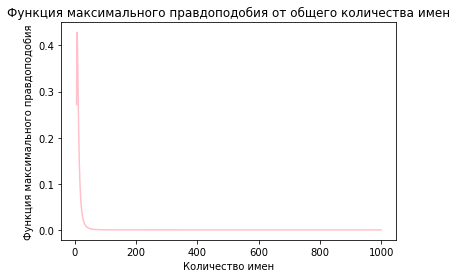

In [103]:
n_values1 = np.arange(6,1000)
ps = [calculate_likelihood(6, n) for n in range(6, 1000)]

plt.plot(n_values1, ps, color = 'pink')
plt.xlabel('Количество имен')
plt.ylabel('Функция максимального правдоподобия')
plt.title('Функция максимального правдоподобия от общего количества имен')

print(f' ML-оценка: {n_values1[ps == np.max(ps)][0]}')


# пункт б)

Напишем функцию, которая бы вычисляла математическое ожидание числа разных имён у 10 таксистов. Для этого мы будем  для каждого k вычислять вероятность calculate_likelihood(k,n) того, что среди 10 таксистов будет ровно k разных имён. 

In [97]:
def expected_names(n):
    sum = 0
    
    for k in range(1, 11):
        sum = sum + k * calculate_likelihood(k,n)
        
    return sum

C:\Users\shagi\AppData\Local\Temp/ipykernel_20248/2876163027.py:22: RuntimeWarning: divide by zero encountered in long_scalars
  probability = probability * (a/(n**(l - k)))


Оценка общего числа таксистов при помощи метода моментов: 8.


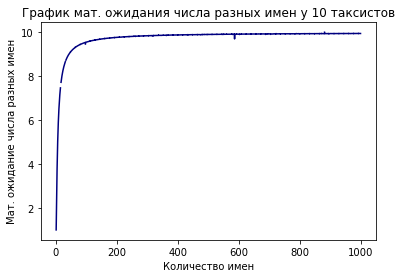

In [106]:
n_values2 = np.arange(1, 1000)
E2 = np.array([expected_names(n) for n in n_values2])

plt.plot(np.arange(1,1000), E2, color = 'navy')
plt.xlabel('Количество имен')
plt.ylabel('Мат. ожидание числа разных имен')
plt.title('График мат. ожидания числа разных имен у 10 таксистов')

print(f'Оценка общего числа таксистов при помощи метода моментов: {n_values2[abs(E2 - 6) == min(abs(E2 - 6))][0]}.')

# Задача 3

# пункт а)

Сначала надо нагенерировать наблюдения:

In [7]:
data = expon.rvs (scale = 1, size = 20)
data

array([0.19785289, 0.07250695, 0.188242  , 0.0079492 , 1.24170027,
       2.17716115, 0.3294011 , 1.99978961, 6.08102981, 0.64775446,
       2.58709133, 2.49073117, 0.16990167, 0.11931748, 1.18732482,
       0.60980863, 0.64466777, 0.63561087, 1.0417917 , 0.6726165 ])

# классический асимптотический нормальный интервал:

In [8]:
mean = data.mean()
mean

1.155112468071503

In [9]:
std = data.std()
std

1.3831316288236621

In [10]:
z_obs_left = mean - 1.96 * std/sqrt(20)
z_obs_left

0.5489283046710788

In [11]:
z_obs_r = mean + 1.96 * std/sqrt(20)
z_obs_r

1.7612966314719274

In [12]:
#np.sum((mean >= z_obs_left - 0,5) & (mean <= z_obs_r + 0,5))

In [13]:
counter = 0
for i in range (0, 10000):
    data = expon.rvs (scale = 1, size = 20)
    mean = data.mean()
    std = data.std()
    z_obs_left = mean - 1.96 * std/sqrt(20)
    z_obs_r = mean + 1.96 * std/sqrt(20)
    if z_obs_left < 1 and z_obs_r > 1:
        counter+=1
counter

9019

In [14]:
p = counter/10000
p

0.9019

# наивный бутстрэп:

In [15]:
nboot = np.random.choice(data, size = (10000, 20))

In [16]:
nboot

array([[0.07122824, 1.76295746, 0.88284824, ..., 2.38852343, 0.26314794,
        2.37437784],
       [1.59342768, 2.1070414 , 2.38852343, ..., 0.5471707 , 0.26314794,
        1.76295746],
       [2.37437784, 0.33098424, 1.52175595, ..., 0.1721006 , 0.1721006 ,
        1.09535368],
       ...,
       [1.52175595, 2.38852343, 1.59342768, ..., 0.33098424, 1.76295746,
        1.52175595],
       [0.88284824, 1.09535368, 0.51504022, ..., 0.5471707 , 0.5471707 ,
        0.13244251],
       [1.76295746, 1.59342768, 0.50629081, ..., 2.38852343, 1.59342768,
        2.38852343]])

In [17]:
counter1 = 0
for i in range (0, 10000):
    data = expon.rvs (scale = 1, size = 20)
    nboot = np.random.choice(data, size = (10000, 20))
    boot_mean = nboot.mean(axis = 1)
    z_l = np.percentile (boot_mean, 2.5)
    z_r = np.percentile (boot_mean, 97.5)
    if z_l < 1 and z_r > 1:
        counter1+=1

In [18]:
counter1

9069

In [19]:
p1 = counter1/10000
p1

0.9069

# бутстрэп t-статистики

In [20]:
counter2 = 0
for i in range (0, 10000):
    data = expon.rvs (scale = 1, size = 20)
    nboot = np.random.choice(data, size = (10000, 20))
    final_boot = (nboot.mean(axis = 1) - data.mean())/nboot.std(axis = 1)
    q_l = np.percentile (final_boot, 2.5)
    q_r = np.percentile (final_boot, 97.5)
    left = data.mean() - q_r*data.std()
    right = data.mean() - q_l*data.std()
    if left < 1 and right > 1:
        counter2+=1
counter2

9440

In [21]:
p2 = counter2/10000
p2

0.944

# пункт б)

# классический асимптотический нормальный интервал:

In [22]:
from scipy.stats import t

In [23]:
counter01 = 0
for i in range (0, 10000):
    data = t.rvs (df = 3, size = 20)
    mean = data.mean()
    std = data.std()
    z_obs_left = mean - 3.182 * std/sqrt(20)
    z_obs_r = mean + 3.182 * std/sqrt(20)
    if z_obs_left < 0 and z_obs_r > 0:
        counter01+=1
counter01

9968

In [24]:
p = counter01/10000
p

0.9968

# наивный бутстрэп:

In [25]:
counter02 = 0
for i in range (0, 10000):
    data = t.rvs (df = 3, size = 20)
    nboot = np.random.choice(data, size = (10000, 20))
    boot_mean = nboot.mean(axis = 1)
    z_l = np.percentile (boot_mean, 2.5)
    z_r = np.percentile (boot_mean, 97.5)
    if z_l < 0 and z_r > 0:
        counter02+=1

In [26]:
p = counter02/10000
p

0.9214

# бутстрэп t-статистики

In [27]:
counter03 = 0
for i in range (0, 10000):
    data = t.rvs (df = 3, size = 20)
    nboot = np.random.choice(data, size = (10000, 20))
    final_boot = (nboot.mean(axis = 1) - data.mean())/nboot.std(axis = 1)
    q_l = np.percentile (final_boot, 2.5)
    q_r = np.percentile (final_boot, 97.5)
    left = data.mean() - q_r*data.std()
    right = data.mean() - q_l*data.std()
    if left < 0 and right > 0:
        counter03+=1
counter03

9204

In [28]:
p = counter03/10000
p

0.9204

# пункт в)

Лучше оказался второй способ, когда наблюдения имеют распределение Стьюдента, так как там вероятность покрытия больше, чем в первом способе.

# Задача 4

In [7]:
df = pd.read_csv('Задачи 4.csv', sep = ';')
df

,Фамилия,Балл
0,Репенкова,16
1,Ролдугина,0
2,Сафина,19
3,Сидоров,26
4,Солоухин,21
...,...,...
327,Сенников,19
328,Ся,0
329,Сятова,0
330,Темиркулов,0


# пункт а)

In [8]:
df_glas = df[df['Фамилия'].str.startswith(('А', 'У', 'О', 'Ы', 'И', 'Э', 'Я', 'Ю', 'Ё', 'Е'))]['Балл']
df_glas

17     25
18     26
32     25
45     29
46     26
47     20
48     19
49     24
50     25
51     28
67     16
68     16
85     15
113    17
114     4
126    23
143    21
144    13
158    16
166    19
167     6
168    15
169     8
170    13
171    23
172    11
173     7
174    12
184    20
188    20
189    17
220    18
221    20
227    17
228    11
229    21
230     5
240    13
270    13
271    13
272    21
273     0
274     0
275     0
276     0
277     0
299     0
300    22
331    16
Name: Балл, dtype: int64

In [9]:
df_soglas = df[df['Фамилия'].str.startswith(('Б', 'В', 'Г', 'Д', 'Ж', 'З', 'Й', 'К', 'Л', 'М', 'Н', 'П', 'Р', 'С', 'Т', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ'))]['Балл']
df_soglas

0      16
1       0
2      19
3      26
4      21
       ..
326     4
327    19
328     0
329     0
330     0
Name: Балл, Length: 283, dtype: int64

In [10]:
std1 = sqrt(df_glas.var()/49 + df_soglas.var()/283)
std1

1.2655940198521967

In [11]:
r_1 = df_glas.mean() - df_soglas.mean()

In [12]:
stats.ttest_ind(df_glas, df_soglas, equal_var = False)

Ttest_indResult(statistic=-0.8519661870595602, pvalue=0.3974027153843839)

Гипотеза не отвергается, так как p-значение больше уровня значимости. 

# пункт б)

In [13]:
glas1 = np.random.choice(df_glas, size = (10000, 49))

In [14]:
np.random.choice(df_glas, size = (10000, 49)).mean(axis = 1)

array([18.18367347, 15.69387755, 14.59183673, ..., 16.02040816,
       15.30612245, 15.42857143])

In [15]:
glas = np.random.choice(df_glas, size = (10000, 49)).mean(axis = 1)

In [16]:
soglas1 = np.random.choice(df_soglas, size = (10000, 283))

In [17]:
np.random.choice(df_soglas, size = (10000, 283)).mean(axis = 1)

array([16.42402827, 15.6254417 , 15.65724382, ..., 16.26855124,
       16.02826855, 16.68551237])

In [18]:
soglas = np.random.choice(df_soglas, size = (10000, 283)).mean(axis = 1)

In [19]:
r = glas - soglas
r

array([-1.11819427,  0.57647653, -1.11862696, ..., -0.93581885,
        0.81683133, -3.38761087])

In [20]:
np.percentile (r, 2.5)

-3.6009176462104273

In [21]:
np.percentile (r, 97.5)

1.345085454676572

In [22]:
r_1

-1.0782433114588574

In [23]:
np.sum(r > 0)/10000

0.194

In [24]:
np.sum(r < 0)/10000

0.806

Минимум из этих долей: 0,194, поэтому p-значение равно 0,194*2 = 0,388. Значит, гипотеза не отвергается.

# пункт в) 

In [25]:
glas.std()

1.1716247342956396

In [26]:
soglas.std()

0.4654331782582396

In [27]:
glas.mean()

15.265785714285713

In [28]:
soglas.mean()

16.3593445229682

In [29]:
glas1.var(axis = 1)/49

array([1.2789569 , 1.16519477, 1.24482146, ..., 1.48210355, 1.28169385,
       1.10453978])

In [30]:
soglas1

array([[16, 17, 16, ..., 17,  0,  0],
       [16,  7, 25, ..., 18, 18, 17],
       [26, 28, 21, ..., 26,  8, 30],
       ...,
       [22, 27, 30, ..., 15, 10, 25],
       [ 7, 12, 19, ..., 24, 20, 10],
       [ 0, 18, 18, ..., 18, 25, 18]], dtype=int64)

In [31]:
std = np.sqrt(glas1.var(axis = 1)/49 + soglas1.var(axis = 1)/283)
std

array([1.23164481, 1.1799323 , 1.20278291, ..., 1.32435134, 1.21526112,
       1.16381276])

In [32]:
glas2 = (glas1.mean(axis = 1) - soglas1.mean(axis = 1) - r_1)/std
glas2

array([-0.70653115,  1.29793684, -1.33827043, ..., -1.35362362,
       -0.42695163, -0.28280039])

In [33]:
np.percentile (glas2, 2.5)

-1.9113414781533886

In [34]:
np.percentile (glas2, 97.5)

2.095133528091791

In [35]:
r_1/std1

-0.8519661870595603

Значит, гипотеза не отвергается.

In [36]:
np.sum(glas2 < r_1/std1)/10000

0.1917

In [37]:
np.sum(glas2 > r_1/std1)/10000

0.8083

Минимум из этих долей: 0,1917, поэтому p-значение равно 0,1917*2 = 0,3834. Значит, гипотеза не отвергается.

# пункт г)

In [38]:
df_per = pd.concat([df_glas, df_soglas])
df_per

17     25
18     26
32     25
45     29
46     26
       ..
326     4
327    19
328     0
329     0
330     0
Name: Балл, Length: 332, dtype: int64

In [39]:
np.random.permutation(df_per)

array([23, 17, 15, 17, 19, 15, 12,  0, 21, 11, 16, 25, 23, 13,  8, 28, 29,
       16, 19, 10, 17, 13, 15, 13, 11, 22, 25,  0, 17, 13, 14, 17, 25, 13,
        0, 19, 27, 19, 23, 16,  4, 12, 19, 24, 21,  0,  0, 16, 14, 20, 25,
        0, 18,  5, 11,  0, 21, 14, 10, 26,  0, 19, 20, 14,  0, 23, 15, 17,
       22, 20, 25, 18, 20,  6, 23, 23, 13, 17, 15, 18, 13, 18, 12, 10, 25,
       18, 29, 25, 26, 10, 21, 27, 23,  9, 22,  0, 24, 16, 27, 16,  0, 24,
        0, 24, 16, 18, 27, 14, 13,  0, 24, 20, 11,  7, 24,  6, 15, 16, 18,
       19, 21, 16,  5, 23, 17, 16,  0, 11,  9, 17, 14,  7, 24, 13, 19, 22,
       23,  5, 21,  0,  8, 21, 18,  0, 22,  0,  0, 18, 24,  7, 24, 18, 19,
       21,  0, 23, 18, 13, 23, 22, 12,  9, 17, 21, 13, 17, 20, 22, 14, 12,
        8, 16, 10, 13, 12, 17, 23,  8, 18, 18, 22,  0,  0, 22, 26, 17, 20,
       20, 24, 15, 14, 18, 18, 25, 23, 23,  0, 22, 22, 18, 25,  8, 20, 20,
       15,  4,  4,  0, 25, 16, 24, 26, 11, 26, 22, 22, 22, 27, 16, 18, 15,
        7, 10, 17, 10, 23

In [40]:
lst = []

In [41]:
for i in range (0, 9999):
    test = np.random.permutation(df_per)
    delta = test[:49].mean() - test[49:].mean()
    lst.append(delta)

In [42]:
np.percentile (lst, 2.5)

-2.466863777313046

In [43]:
np.percentile (lst, 97.5)

2.3933078531766068

In [44]:
r_1

-1.0782433114588574

In [45]:
lst1 = np.array(lst)

In [46]:
np.sum(lst1 < r_1)/10000

0.1898

In [47]:
np.sum(lst1 > r_1)/10000

0.8057

Минимум из этих долей: 0,1898, поэтому p-значение равно 0,1898*2 = 0,3796. Значит, гипотеза не отвергается.

# Задача 5

# пункт а)

In [48]:
median = df['Балл'].median()
median

17.5

Медиана балла за экзамен равна 17,5.

Создадим новую переменную, которая будет принимать значение True, если первая буква фамилии - гласная, и значение False - если согласная.

In [49]:
df['lettervowel'] = df['Фамилия'].str.startswith(('А', 'У', 'О', 'Ы', 'И', 'Э', 'Я', 'Ю', 'Ё', 'Е'))
df['lettervowel'] = df['lettervowel'].astype(int)
df

,Фамилия,Балл,lettervowel
0,Репенкова,16,0
1,Ролдугина,0,0
2,Сафина,19,0
3,Сидоров,26,0
4,Солоухин,21,0
...,...,...,...
327,Сенников,19,0
328,Ся,0,0
329,Сятова,0,0
330,Темиркулов,0,0


In [50]:
n1 = 0
n2 = 0
n3 = 0
n4 = 0
for i in range (0, 332):
    if (df['Балл'][i] < median) & (df['lettervowel'][i] == 1):
        n1+=1
    if (df['Балл'][i] > median) & (df['lettervowel'][i] == 1):
        n2+=1
    if (df['Балл'][i] < median) & (df['lettervowel'][i] == 0):
        n3+=1
    if (df['Балл'][i] > median) & (df['lettervowel'][i] == 0):
        n4+=1

In [51]:
n1, n2, n3, n4

(28, 21, 138, 145)

In [52]:
data = {'Меньше медианы': [28, 138], 'Больше медианы': [21, 145]} 
 

df_sopr = pd.DataFrame(data, index = ['Гласная', 'Согласная']) 
df_sopr


,Меньше медианы,Больше медианы
Гласная,28,21
Согласная,138,145


Далее задачу я решала на листочке, так как так мне было удобнее строить Доверительный Интервал и выполнять все вычисления.

![title](123-1.png)

В данном пункте гипотеза отвергаться не будет, так как значение 1 входит в наш интервал.

# пункт б)

Этот пункт я тоже сделала на листочке.

![title](0.png)

Получается, что значение 1 снова входит в интервал, значит, гипотеза не отвергается. P-value будет равно 0,199.

# пункт в)

In [62]:
df_glas5 = df[df.Балл > median][df.lettervowel == 1]

C:\Users\shagi\AppData\Local\Temp/ipykernel_23520/3470118115.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_glas5 = df[df.Балл > median][df.lettervowel == 1]


In [63]:
df_glas5

,Фамилия,Балл,lettervowel
17,Адилхан,25,1
18,Алексанян,26,1
32,Охотин,25,1
45,Аврамчук,29,1
46,Авсеенко,26,1
47,Адамокова,20,1
48,Адамцева,19,1
49,Азаров,24,1
50,Алексеева,25,1
51,Афанасьев,28,1


In [64]:
df_soglas5 = df[df.Балл > median][df.lettervowel == 0]
df_soglas5

C:\Users\shagi\AppData\Local\Temp/ipykernel_23520/2858113806.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_soglas5 = df[df.Балл > median][df.lettervowel == 0]


,Фамилия,Балл,lettervowel
2,Сафина,19,0
3,Сидоров,26,0
4,Солоухин,21,0
5,Старощук,22,0
6,Стогова,20,0
...,...,...,...
315,Мацко,23,0
316,Менаджиев,25,0
317,Москвина,19,0
324,Полищук,25,0


In [65]:
glas_g = np.random.choice(df_glas5['Балл'], size = (10000, 21))

In [66]:
soglas_g = np.random.choice(df_soglas5['Балл'], size = (10000, 145))

In [67]:
gen_boot_sample = np.append(glas_g, soglas_g, axis = 1)

In [68]:
meds = np.median(gen_boot_sample, axis = 1)
meds

array([23., 23., 22., ..., 23., 22., 22.])

In [69]:
glas_gb = (glas_g > meds.reshape(-1, 1)).sum(axis = 1)

In [70]:
glas_gl = (glas_g <= meds.reshape(-1, 1)).sum(axis = 1)

In [71]:
glas5 = glas_gb/glas_gl

In [72]:
soglas_gb = (soglas_g > meds.reshape(-1, 1)).sum(axis = 1)

In [73]:
soglas_gl = (soglas_g <= meds.reshape(-1, 1)).sum(axis = 1)

In [74]:
soglas5 = soglas_gb/soglas_gl

In [75]:
ch_obs = glas5/soglas5
ch_obs

array([0.81818182, 2.38461538, 0.82608696, ..., 0.66935484, 0.44057971,
       2.99242424])

In [76]:
np.percentile (ch_obs, 2.5)

0.36325851393188857

In [77]:
np.percentile (ch_obs, 97.5)

2.612244897959184

Значение 1 входит в наш ДИ, поэтому гипотеза не отвергается. P-value = 0.9898.

# Задача 6

# пункт а)

In [75]:
df['Количество букв в фамилии'] = df['Фамилия'].apply(len)

In [76]:
df

,Фамилия,Балл,lettervowel,Количество букв в фамилии
0,Репенкова,16,0,9
1,Ролдугина,0,0,9
2,Сафина,19,0,6
3,Сидоров,26,0,7
4,Солоухин,21,0,8
...,...,...,...,...
327,Сенников,19,0,8
328,Ся,0,0,2
329,Сятова,0,0,6
330,Темиркулов,0,0,10


In [77]:
score_mean = df['Балл'].mean()
score_mean

16.204819277108435

In [78]:
f_mean = df['Количество букв в фамилии'].mean()
f_mean

7.86144578313253

In [79]:
beta = score_mean/f_mean
beta

2.0613026819923372

Оцененная методом моментов Бета: 2,06.

In [80]:
df['Балл'].corr(df['Количество букв в фамилии'])

0.025328052669147665

# пункт б)

In [81]:
table = df['Балл']. copy ()
table

0      16
1       0
2      19
3      26
4      21
       ..
327    19
328     0
329     0
330     0
331    16
Name: Балл, Length: 332, dtype: int64

In [82]:
df_1 = pd.DataFrame(np.random.permutation(table))
df_1

,0
0,16
1,18
2,23
3,16
4,18
...,...
327,0
328,4
329,16
330,26


In [83]:
corr_coef = []

In [84]:
for i in range (0, 9999):
    test = np.random.permutation(table)
    df_test = pd.DataFrame(test)
    df_test.columns =['Балл']
    coefs = df_test['Балл'].corr(df['Количество букв в фамилии'])
    corr_coef.append(coefs)

In [85]:
corr_coef

[-0.050599888917924066,
 0.027873123336870736,
 -0.049751532028683,
 0.006452111883534858,
 0.0333874431169374,
 -0.034056929577724035,
 0.09383287147536043,
 -0.08135282615291119,
 0.03169072933845536,
 -0.01793814868214457,
 -0.038934981690859925,
 -0.027906342130726618,
 0.010057628662809232,
 -0.10022876693852395,
 0.02702476644762972,
 0.06053486357265018,
 0.0696547001319912,
 -0.12992125806195987,
 0.03317535389462718,
 -0.04784272902789066,
 0.07050305702123226,
 0.06350411268499374,
 -0.013908453458249719,
 0.03169072933845536,
 -0.08665505671066759,
 0.0019982382150195038,
 -0.09344191182459578,
 0.06074695279496043,
 0.036780870673901504,
 -0.02090739779448815,
 0.04187101200934767,
 0.006664201105845147,
 0.0032707735488810685,
 0.07898662591364247,
 -0.12101351072492907,
 0.04611279645555278,
 0.02087417900063231,
 0.08110751813674505,
 -0.032148126576931745,
 0.055868900681824554,
 -0.09386609026921637,
 -0.05378122725257783,
 0.018329108332909204,
 0.0075125579950861545,

In [86]:
np.percentile (corr_coef, 2.5)

-0.10680353283014189

In [87]:
np.percentile (corr_coef, 97.5)

0.10846702781476802

Значение 0 входит в данный интервал, значит, гипотеза о том, что корреляция равна 0, не отвергается. 

In [88]:
coefs1 = np.array(corr_coef)

In [89]:
np.sum(coefs1 < 0)/10000

0.5002

In [90]:
np.sum(coefs1 >= 0)/10000

0.4997

Получается, что p-value равно 0,9994.

# Задача 7

Я взяла задачу из Теории Вероятностей из КР-1 2015-2016 года.

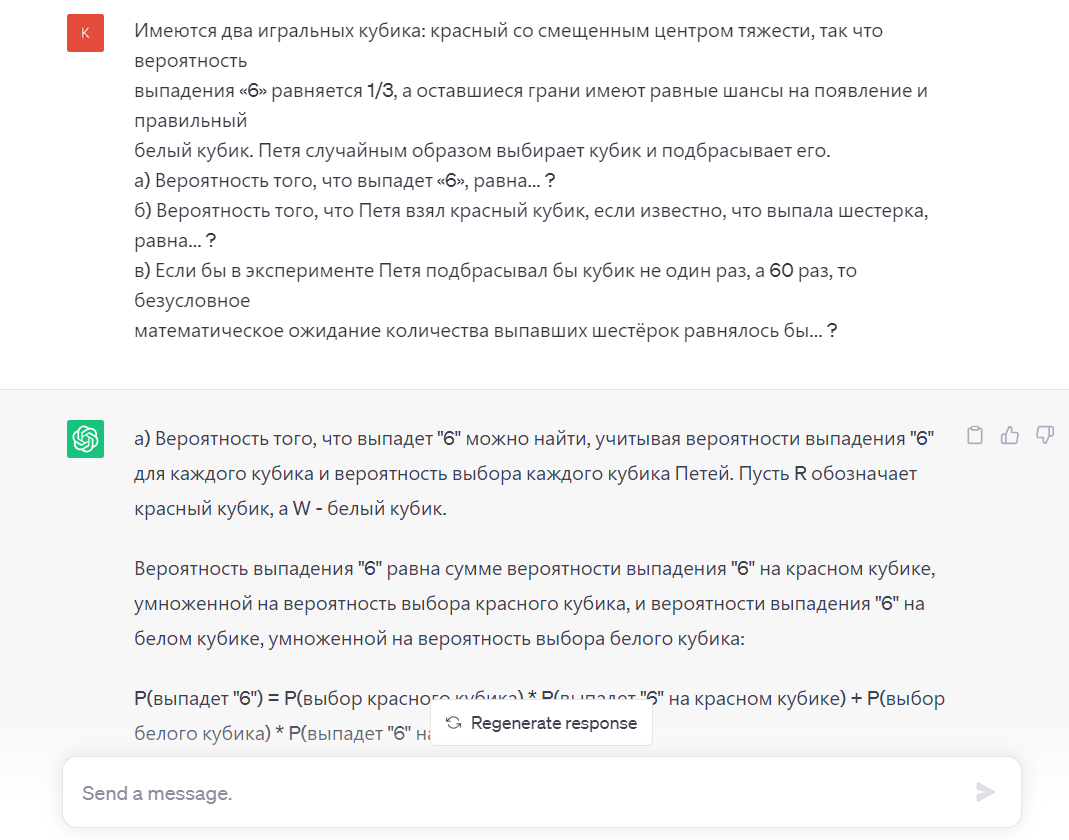

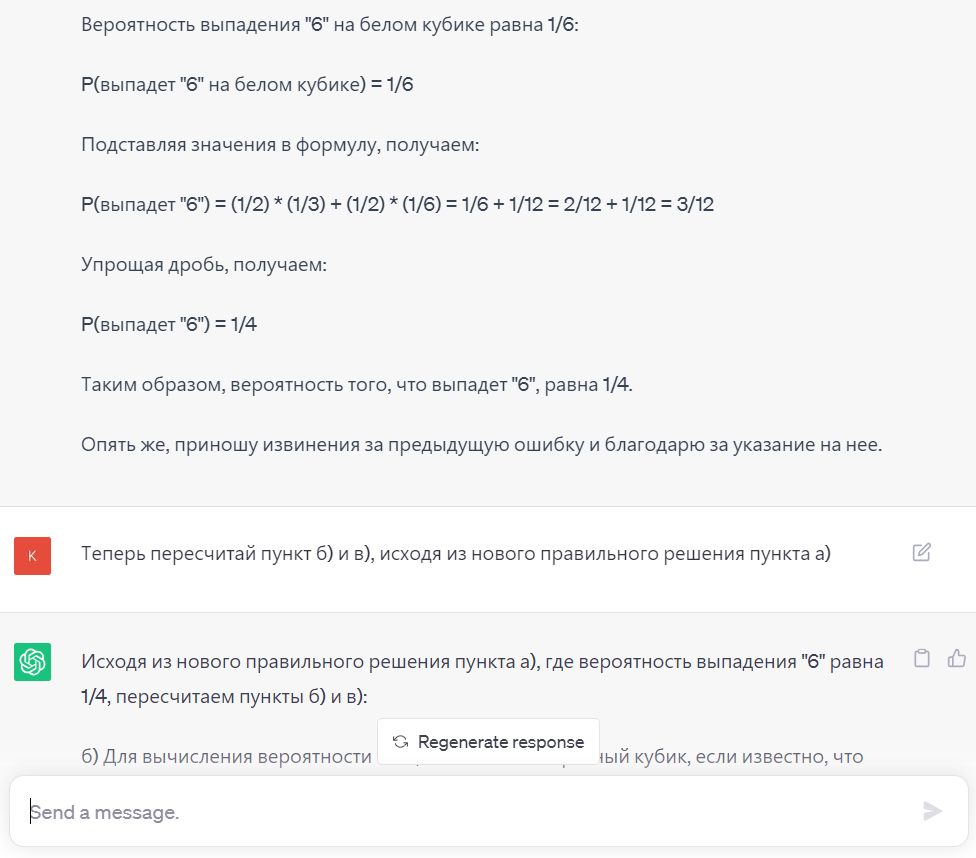

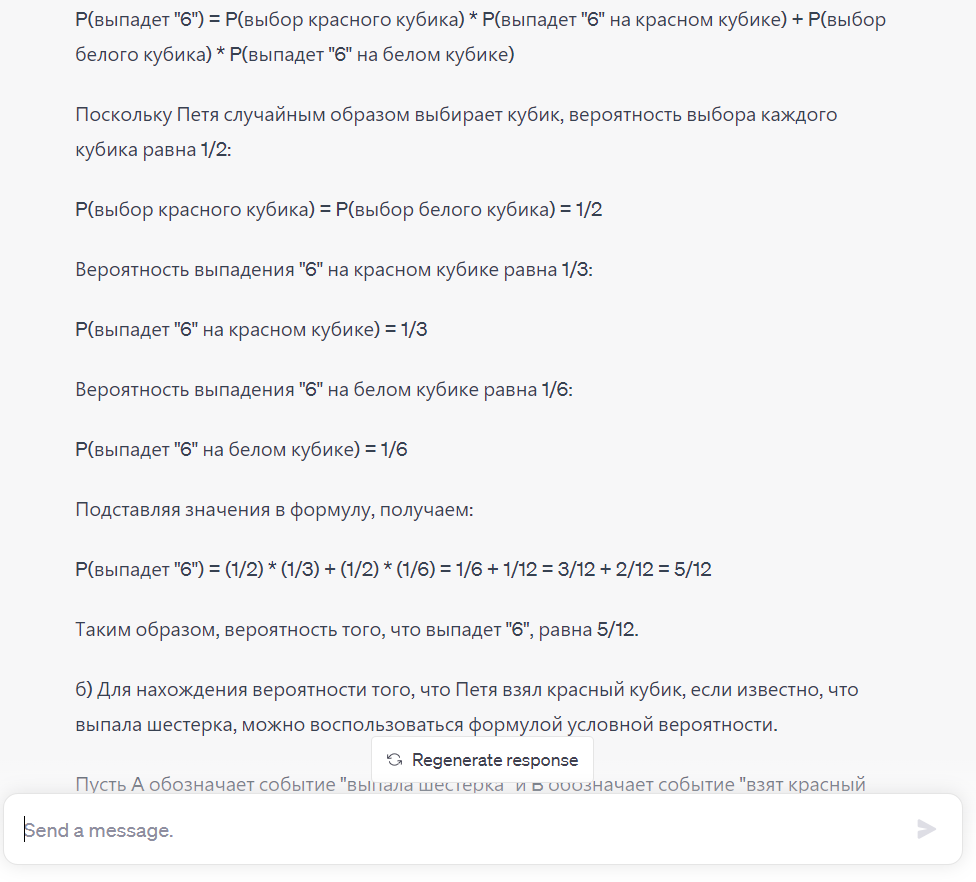

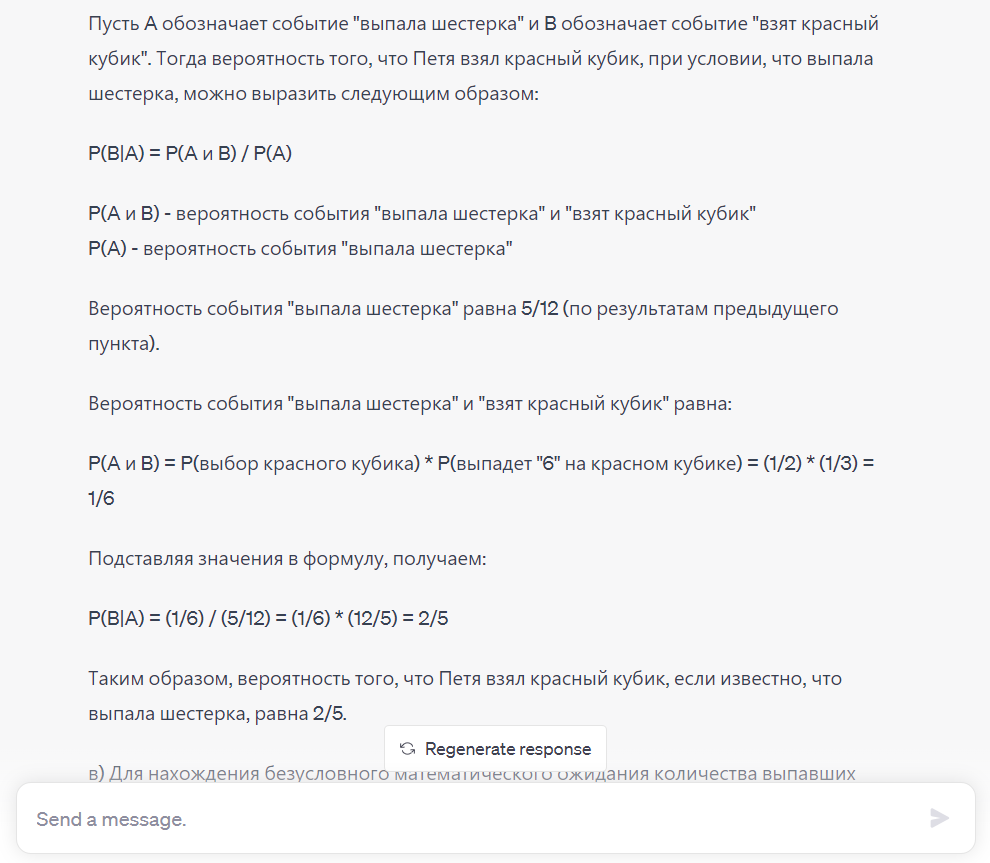

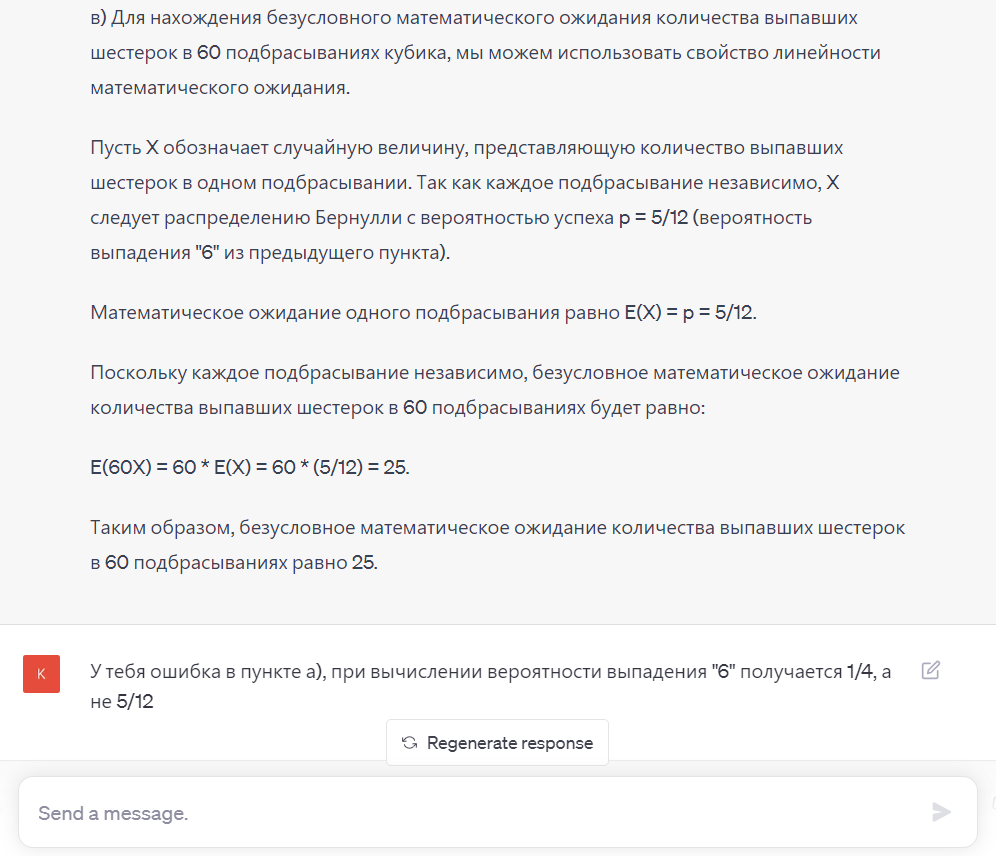

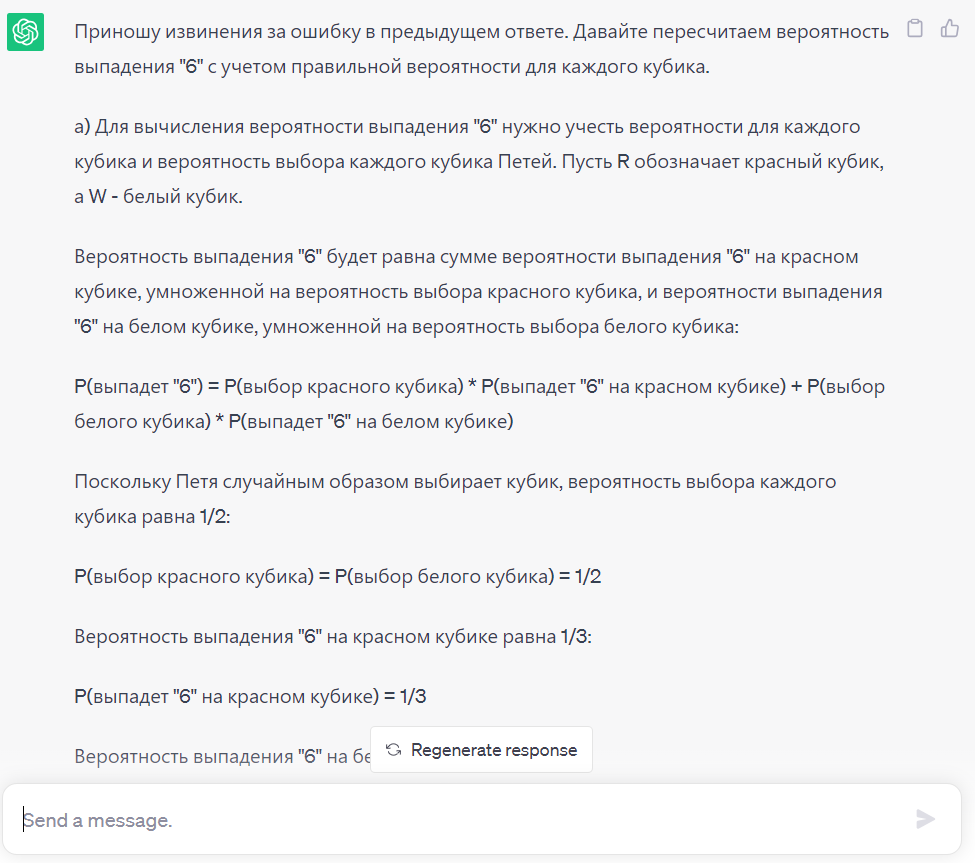

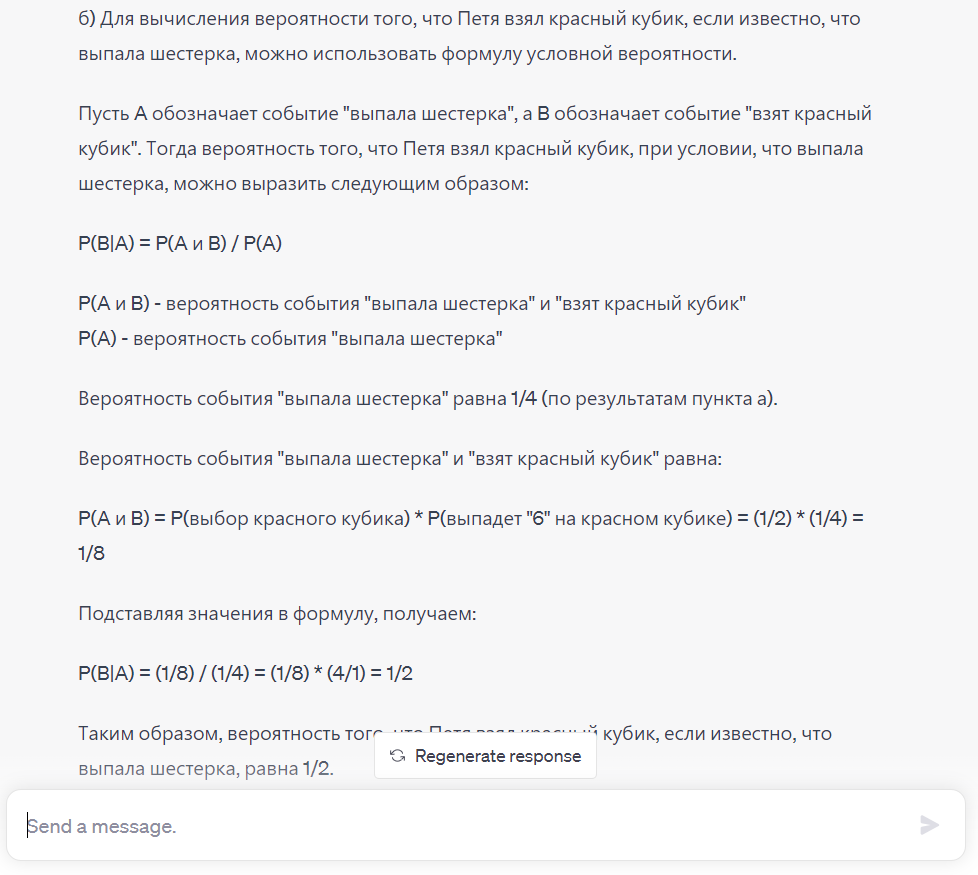

![title](pic1.png)

![title](pic2.png)

![title](pic3.png)

Таким образом, с помощью подсказок и исправления ошибок удалось добиться правильных ответов и решений.

# Задача 8

Мне был полезен курс от Яндекс.Практикума, особенно в начале года, когда мы только начали изучение Теории Вероятностей. В нем есть хорошие блоки по Теории вероятностей и Комбинаторике, которые как раз и помогли лучше понимать, что конкретно мы будем делать в курсе Теории Вероятностей, и некоторые темы стали проще восприниматься. Вот ссылка на Яндекс.Практикум: https://practicum.yandex.ru/profile/math-foundations/.